In [29]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials
from array import array
import os
from PIL import Image
import sys
import time
import os

# os.environ["VISION_ENDPOINT"] = "https://ai-labariism.cognitiveservices.azure.com/" -> setx VISION_KEY your-key
# os.environ["VISION_KEY"] = "1515fb2cd755418e9bb24b0156ce330a" -> setx VISION_ENDPOINT your-endpoint

'''
Authenticate
Authenticates your credentials and creates a client.
'''
subscription_key = os.environ["VISION_KEY"]
endpoint = os.environ["VISION_ENDPOINT"]
computervision_client = ComputerVisionClient(endpoint, CognitiveServicesCredentials(subscription_key))
'''
END - Authenticate
'''

'\nEND - Authenticate\n'

In [30]:
#img = open("D:/FACULTATE/SEM4/AI/Lab3/test1.png", "rb")
img = open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg", "rb")

read_response = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)
# print(read_response.as_dict())

operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)

# Print the detected text, line by line
result = []
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            result.append(line.text)

print()

Lucces in resolvarea
TEMELOR la
LABORA toarele de
Inteligenta Artificialà!



In [31]:
# get/define the ground truth
# groundTruth = ["Google Cloud", "Platform"]
groundTruth = ["Succes in rezolvarea", "tEMELOR la", "LABORAtoaree de", "Inteligenta Artificiala!"]

# compute the performance
noOfCorrectLines = sum(i == j for i, j in zip(result, groundTruth))
print(noOfCorrectLines)

0


In [30]:
#PRACTICE

In [32]:
#1a

import pathlib

# Calea către fișierul cu imaginea
file_path = "D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg"
file_path = os.path.abspath(file_path)
# Convertirea căii către un URL local
print("URI-ul imaginii:", file_path)
file_url = "file://" + file_path
print("URL-ul imaginii:", file_url)

URI-ul imaginii: D:\FACULTATE\SEM4\AI\Lab3\test2.jpeg
URL-ul imaginii: file://D:\FACULTATE\SEM4\AI\Lab3\test2.jpeg


In [33]:
print("analyze_image_in_stream")
image_analysis = computervision_client.analyze_image_in_stream(open(file_path, "rb"), visual_features=[VisualFeatureTypes.tags])
for tag in image_analysis.tags:
    print(tag)

analyze_image_in_stream
{'additional_properties': {}, 'name': 'text', 'confidence': 0.9991968870162964, 'hint': None}
{'additional_properties': {}, 'name': 'handwriting', 'confidence': 0.9847410321235657, 'hint': None}
{'additional_properties': {}, 'name': 'letter', 'confidence': 0.9442323446273804, 'hint': None}
{'additional_properties': {}, 'name': 'paper', 'confidence': 0.9316203594207764, 'hint': None}
{'additional_properties': {}, 'name': 'paper product', 'confidence': 0.8896652460098267, 'hint': None}
{'additional_properties': {}, 'name': 'calligraphy', 'confidence': 0.8830744028091431, 'hint': None}
{'additional_properties': {}, 'name': 'ink', 'confidence': 0.8404577970504761, 'hint': None}
{'additional_properties': {}, 'name': 'document', 'confidence': 0.5317698121070862, 'hint': None}


In [34]:
print("Get subject domain list")
models = computervision_client.list_models()
for x in models.models_property:
    print(x)

Get subject domain list
{'additional_properties': {}, 'name': 'celebrities', 'categories': ['people_', '人_', 'pessoas_', 'gente_']}
{'additional_properties': {}, 'name': 'landmarks', 'categories': ['outdoor_', '户外_', '屋外_', 'aoarlivre_', 'alairelibre_', 'building_', '建筑_', '建物_', 'edifício_']}


In [35]:
print("Analyze an image by domain")
domain = "landmarks"
language = "en"

with open(file_path, "rb") as image_stream:
    image_analysis = computervision_client.analyze_image_in_stream(image_stream, visual_features=[VisualFeatureTypes.tags])

# Afisarea etichetelor asociate imaginii
if image_analysis.tags:
    print("Tags:")
    for tag in image_analysis.tags:
        print(tag.name)
else:
    print("No tags found")

Analyze an image by domain
Tags:
text
handwriting
letter
paper
paper product
calligraphy
ink
document


In [36]:
print("Get text description of an image")
domain = "landmarks"
language = "en"
max_descriptions = 3

# Analiza imaginii utilizând fluxul binar al imaginii
with open(file_path, "rb") as image_stream:
    analysis = computervision_client.describe_image_in_stream(image_stream, max_descriptions, language)

# Afisarea descrierii textuale a imaginii
for caption in analysis.captions:
    print(caption.text)
    print(caption.confidence) #nivelul de incredere

Get text description of an image
text, letter
0.9998726844787598


In [37]:
print("Get text from image")
img = img = open(file_path, "rb")

# SDK call
rawHttpResponse = computervision_client.read_in_stream(
    image=img,
    mode="Printed",
    raw=True
)

# Get ID from returned headers
operation_id = read_response.headers['Operation-Location'].split('/')[-1]
while True:
    read_result = computervision_client.get_read_result(operation_id)
    if read_result.status not in ['notStarted', 'running']:
        break
    time.sleep(1)


result = []
if read_result.status == OperationStatusCodes.succeeded:
    for text_result in read_result.analyze_result.read_results:
        for line in text_result.lines:
            print(line.text)
            result.append(line.text)
        
print("OK")

Get text from image
Lucces in resolvarea
TEMELOR la
LABORA toarele de
Inteligenta Artificialà!
OK


In [1]:
#Microsoft Caourse


Text:
  Succes in rezolvarea
    Succes
    in
    rezolvarea
  TEMELOR la
    TEMELOR
    la
  LABORA toarele de
    LABORA
    toarele
    de
  Inteligentà Artificialà!
    Inteligentà
    Artificialà!


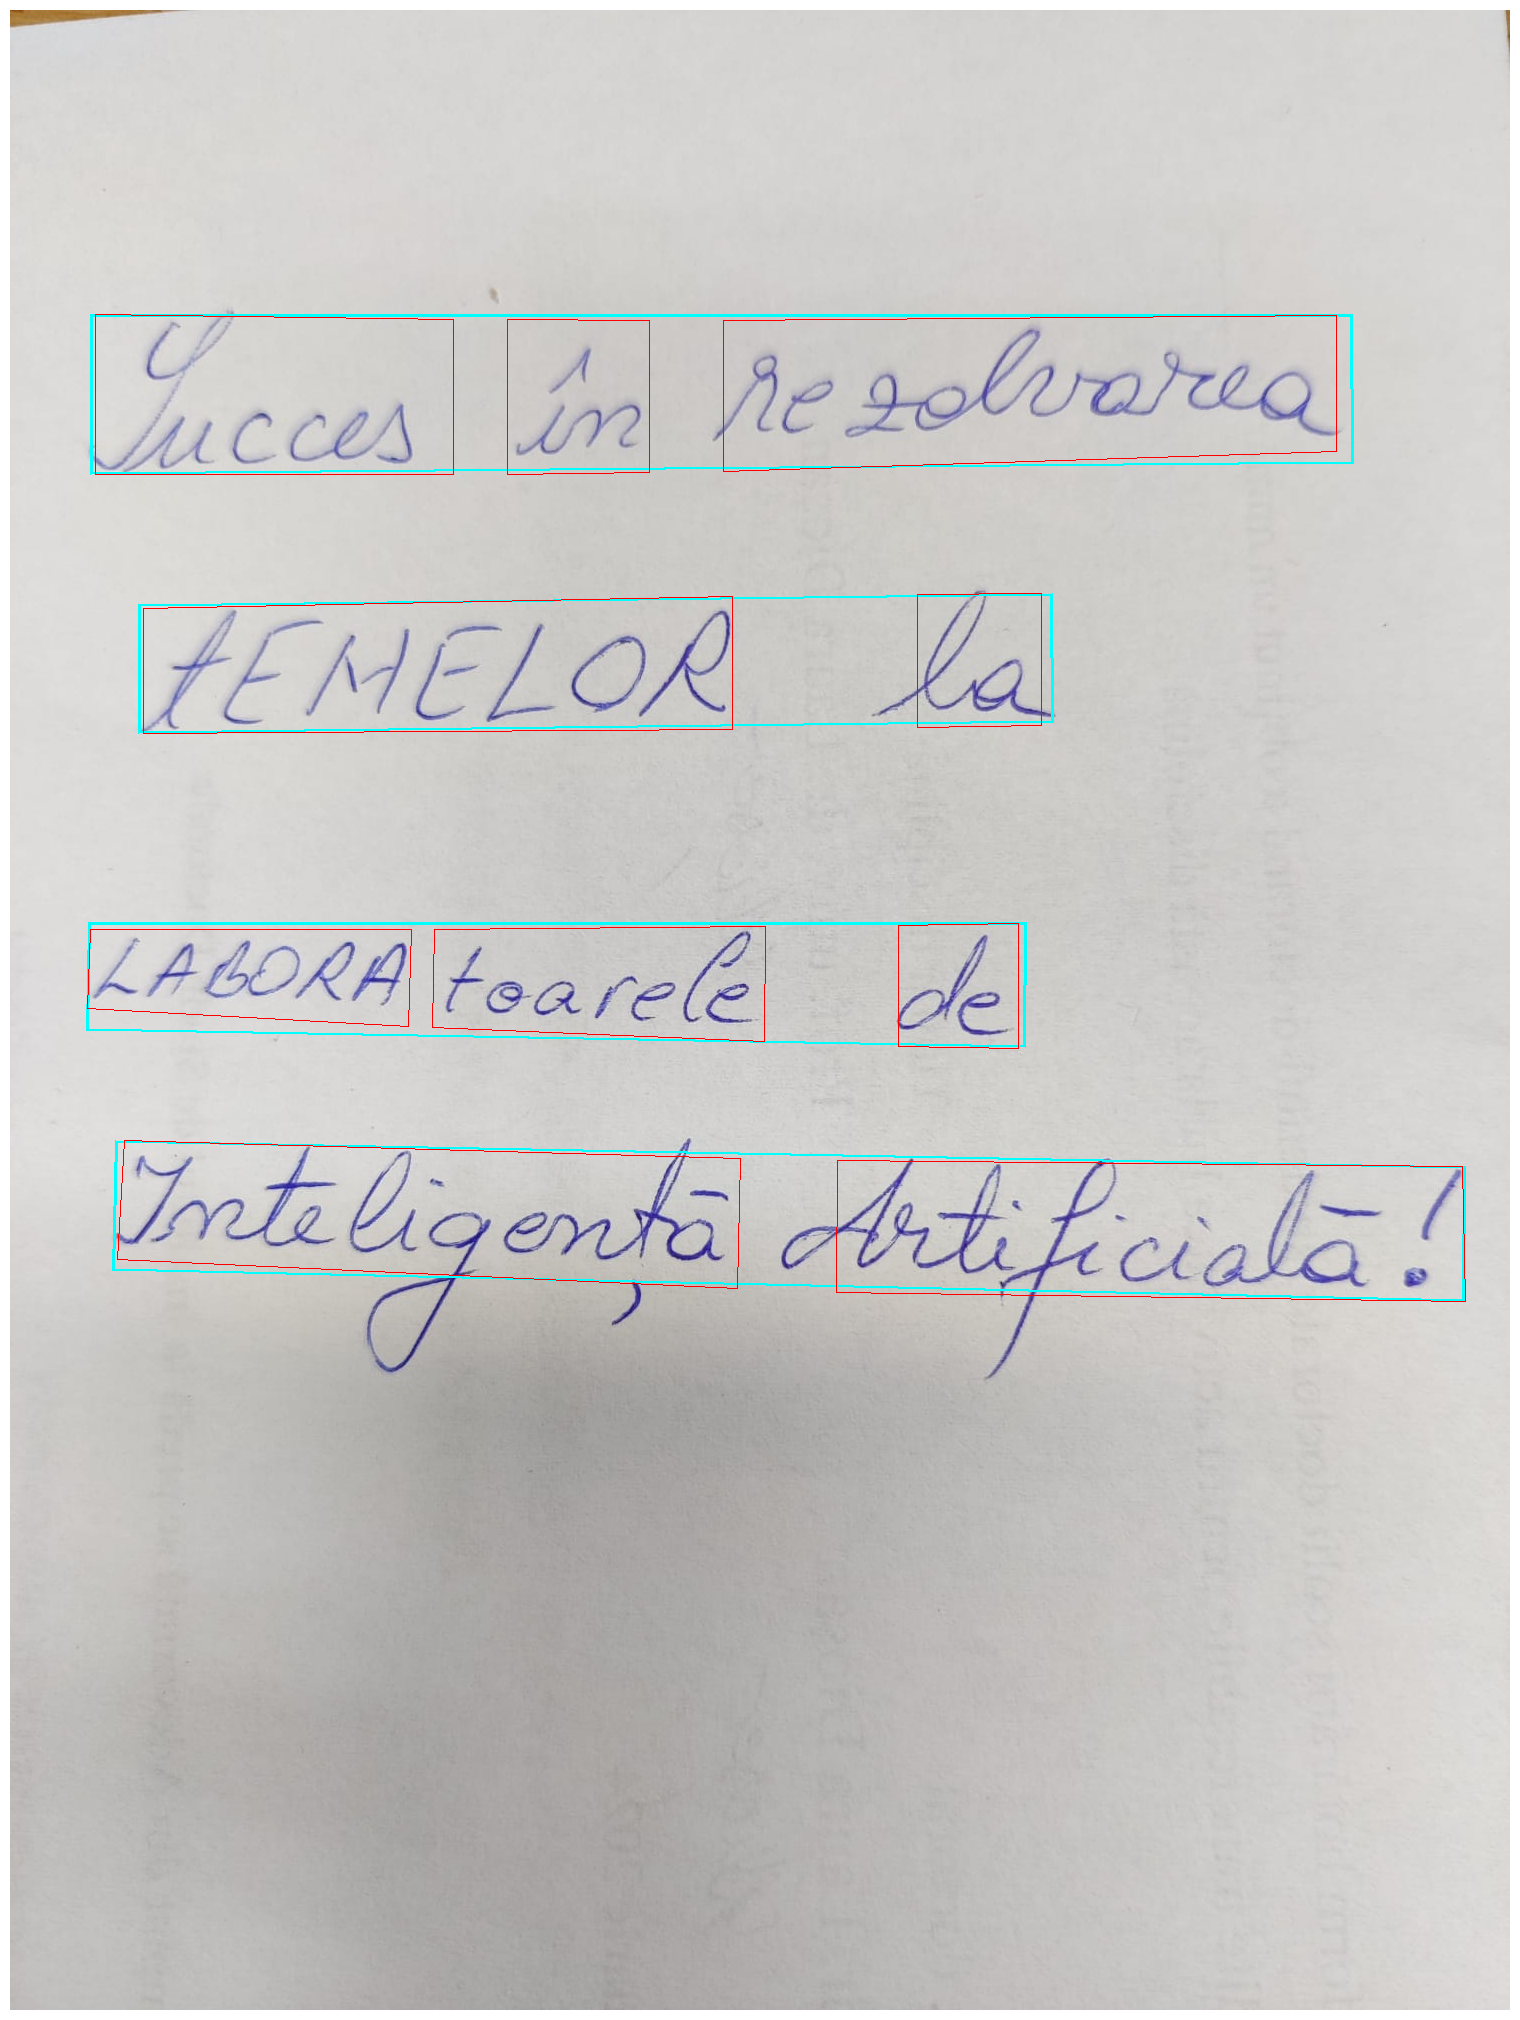

In [62]:
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw

with open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg", "rb") as image_file:
    image_data = image_file.read()

result = cv_client.analyze(
     image_data=image_data,
     visual_features=[VisualFeatures.READ]
 )

if result.read is not None:
     print("\nText:")

     # Prepare image for drawing
     image = Image.open("D:/FACULTATE/SEM4/AI/Lab3/test2.jpeg")
     fig = plt.figure(figsize=(image.width/100, image.height/100))
     plt.axis('off')
     draw = ImageDraw.Draw(image)
     color = 'cyan'

     for line in result.read.blocks[0].lines:
         # Return the text detected in the image
         print(f"  {line.text}")    
            
         drawLinePolygon = True
            
         r = line.bounding_polygon
         bounding_polygon = ((r[0].x, r[0].y),(r[1].x, r[1].y),(r[2].x, r[2].y),(r[3].x, r[3].y))
         draw.polygon(bounding_polygon, outline=color, width=3)
         # Return the position bounding box around each line
            
            # Return each word detected in the image and the position bounding box around each word with the confidence level of each word
         for word in line.words:
             print(f"    {word.text}")
            # Draw word bounding box
             wr = word.bounding_polygon  
             word_bounding_box  = ((wr[0].x, wr[0].y), (wr[1].x, wr[1].y), (wr[2].x, wr[2].y), (wr[3].x, wr[3].y))
             draw.polygon(word_bounding_box, outline="red", width=1)
         # Return each word detected in the image and the position bounding box around each word with the confidence level of each word
            
            
         # Draw line bounding polygon
         #if drawLinePolygon:
           #  draw.polygon(bounding_polygon, outline=color, width=3)

     # Save image
     plt.imshow(image)
     plt.tight_layout(pad=0)
     outputfile = 'test2.jpeg'
     # fig.savefig(outputfile)
     # print('\n  Results saved in', outputfile)

    
